In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
import random
from matplotlib.animation import FuncAnimation
from IPython import display

In [4]:
from time import time
def runtime(t0):
    dt = time() - t0
    if dt < 60:
        message = f'{dt:.0f} sec.'
    elif dt < 3600:
        message = f'{dt/60:.0f} min.'
    else:
        h = int(dt//3600)
        m = int((dt%3600) / 60)
        message = f'{h} h. {m} min.'
    print(message)

In [23]:
class Particle():
    def __init__(self, initial_state=[10, 10, 10, 10], box_size=100, color='b'):
        self.x  = initial_state[0]
        self.y  = initial_state[1]
        self.vx = initial_state[2]
        self.vy = initial_state[3]
        self.box_size = box_size
        self.color = color
        
    def get_position(self):
        return self.x, self.y
    
    def get_velocity(self):
        return self.vx, self.vy
    
    def get_color(self):
        return self.color
    
    def move(self, dt):
        if (self.x < 0 or self.x > self.box_size):
            # particle at the x boundary
            self.vx = - self.vx
            
        if (self.y < 0 or self.y > self.box_size):
            # particle at the y boundary
            self.vy = - self.vy
            
        self.x += self.vx * dt
        self.y += self.vy * dt

In [54]:
t0 = time()
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
lines = ax.plot([], 'o')
line = lines[0]
# Construct the scatter that will update during animation
# scat = ax.scatter([], [], edgecolors='b',
#                   facecolors='b')

# other static stuff
ax.set_aspect('equal')
box_size = 200
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
time_text = ax.text(40, box_size+2, '')

num_particles = 250
vmax = .05
particles = []
for _ in range(num_particles):
    x0  = box_size*random.uniform(0, 1)
    y0  = box_size*random.uniform(0, 1)
    vx0 = vmax*random.uniform(-1, 1)
    vy0 = vmax*random.uniform(-1, 1)
    initial_state1 = [x0, y0, vx0, vy0]
    p = Particle(initial_state=initial_state1, 
                 box_size=box_size)
    particles.append(p)
    


p0 = Particle(initial_state=[102, 25, vmax*30, vmax*30], 
              box_size=box_size, color='r')
particles.append(p0)

def init():
    """initialize animation"""
    line.set_data([], [])
#     scat.set_offsets()
    time_text.set_text('')
        
    return line, time_text

def animate(frame):
    x, y = [], []
    for p in particles:
        p.move(1)
        xy = p.get_position()
        x.append(xy[0])
        y.append(xy[1])
    line.set_data((x, y))
    line.set_color(color='limegreen')
    
    if frame % 10 == 0:
        time_text.set_text(f'time = {frame:.0f}')
    return line, time_text

num_loops = 2
    
animt = FuncAnimation(fig, animate, init_func=init, frames=100*num_loops, interval=30, repeat=True)
video = animt.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
runtime(t0)

10 sec.


In [5]:
animt.save('animt.gif', writer='imagemagick')

In [56]:
discs

array([([0.3595079 , 0.43703195], [0., 0., 0., 0.]),
       ([0.6976312 , 0.06022547], [0., 0., 0., 0.]),
       ([0.66676672, 0.67063787], [0., 0., 0., 0.]),
       ([0.21038256, 0.1289263 ], [0., 0., 0., 0.]),
       ([0.31542835, 0.36371077], [0., 0., 0., 0.]),
       ([0.57019677, 0.43860151], [0., 0., 0., 0.]),
       ([0.98837384, 0.10204481], [0., 0., 0., 0.]),
       ([0.20887676, 0.16130952], [0., 0., 0., 0.]),
       ([0.65310833, 0.2532916 ], [0., 0., 0., 0.]),
       ([0.46631077, 0.24442559], [0., 0., 0., 0.]),
       ([0.15896958, 0.11037514], [0., 0., 0., 0.]),
       ([0.65632959, 0.13818295], [0., 0., 0., 0.]),
       ([0.19658236, 0.36872517], [0., 0., 0., 0.]),
       ([0.82099323, 0.09710128], [0., 0., 0., 0.]),
       ([0.83794491, 0.09609841], [0., 0., 0., 0.]),
       ([0.97645947, 0.4686512 ], [0., 0., 0., 0.]),
       ([0.97676109, 0.60484552], [0., 0., 0., 0.]),
       ([0.73926358, 0.03918779], [0., 0., 0., 0.]),
       ([0.28280696, 0.12019656], [0., 0., 0.,

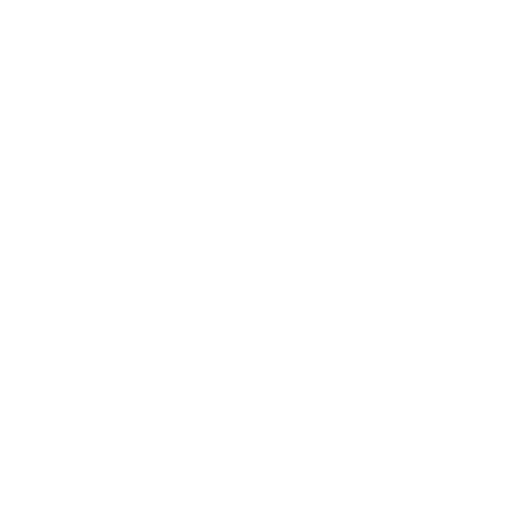

In [55]:
t0 = time()
# fig, ax = plt.subplots()
# fig.set_size_inches(6, 6)
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

num_discs = 50
disc_size = 10
discs = np.zeros(num_discs, dtype=[('position', float, 2),
                                   ('color',    float, 4)])

discs['position'] = np.random.uniform(0, 1, (num_discs, 2))

scat = ax.scatter(discs['position'][:, 0], discs['position'][:, 1],
                  s=disc_size, lw=0.5, edgecolors=discs['color'],
                  facecolors='none')


# lines = ax.plot([], 'o')
# line = lines[0]
# # Construct the scatter that will update during animation
# # scat = ax.scatter([], [], edgecolors='b',
# #                   facecolors='b')

# # other static stuff
# ax.set_aspect('equal')
# box_size = 200
# ax.set_xlim(0, box_size)
# ax.set_ylim(0, box_size)
# time_text = ax.text(40, box_size+2, '')

# num_particles = 250
# vmax = .05
# particles = []
# for _ in range(num_particles):
#     x0  = box_size*random.uniform(0, 1)
#     y0  = box_size*random.uniform(0, 1)
#     vx0 = vmax*random.uniform(-1, 1)
#     vy0 = vmax*random.uniform(-1, 1)
#     initial_state1 = [x0, y0, vx0, vy0]
#     p = Particle(initial_state=initial_state1, 
#                  box_size=box_size)
#     particles.append(p)
    


# p0 = Particle(initial_state=[102, 25, vmax*30, vmax*30], 
#               box_size=box_size, color='r')
# particles.append(p0)

# def init():
#     """initialize animation"""
#     line.set_data([], [])
# #     scat.set_offsets()
#     time_text.set_text('')
        
#     return line, time_text

# def animate(frame):
#     x, y = [], []
#     for p in particles:
#         p.move(1)
#         xy = p.get_position()
#         x.append(xy[0])
#         y.append(xy[1])
#     line.set_data((x, y))
#     line.set_color(color='limegreen')
    
#     if frame % 10 == 0:
#         time_text.set_text(f'time = {frame:.0f}')
#     return line, time_text

# num_loops = 2
    
# animt = FuncAnimation(fig, animate, init_func=init, frames=100*num_loops, interval=30, repeat=True)
# video = animt.to_html5_video()
# html = display.HTML(video)
# display.display(html)
# plt.close()
# runtime(t0)

In [9]:
"""
Animation of Elastic collisions with Gravity

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

from scipy.spatial.distance import pdist, squareform
import scipy.integrate as integrate

t0 = time()

class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 0):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = 0 + np.random.random((10, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 50 # fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

animt = FuncAnimation(fig, animate, frames=600,
                      interval=10, blit=True, init_func=init)

# animt = FuncAnimation(fig, animate, init_func=init, frames=100*num_loops, interval=30, repeat=True)
video = animt.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
runtime(t0)

22 sec.


In [6]:
animt.save('animt2.gif', writer='imagemagick')